In [1]:
!pip install --upgrade mlxtend

     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/frequent_file_2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       315 non-null    object
 1   2       285 non-null    object
 2   3       245 non-null    object
 3   4       187 non-null    object
 4   5       133 non-null    object
 5   6       71 non-null     object
 6   7       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


Each row contains a list of the items purchased by a customer. One purchase has a maximum of 7 items purchased and at least one item purchased. Here is what the dataset with 315 rows looks like

In [5]:
df.head()

,1,2,3,4,5,6,7
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


Following are the individual items that can be bought. Here we see there are 9 unique items that can be bought at the store.

In [ ]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{nan, 'Bagel', 'Meat', 'Bread', 'Cheese', 'Milk', 'Eggs', 'Pencil', 'Wine', 'Diaper'}


Next, we want to convert the regular dataset format to a one-hot encoded format where each row has 9 binary entries, one for each item. a 1 means that the item is present and a 0 means that the item is not present.

In [ ]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

Let us remove the NaN column in the one hot encoded dataset and take a look at the first few rows

In [ ]:
ohe_df = ohe_df.drop(ohe_df.columns[0], axis=1)

In [ ]:
ohe_df.head()

,Bagel,Milk,Bread,Meat,Cheese,Eggs,Pencil,Wine,Diaper
0,0,0,1,1,1,1,1,1,1
1,0,1,1,1,1,0,1,1,1
2,0,1,0,1,1,1,0,1,0
3,0,1,0,1,1,1,0,1,0
4,0,0,0,1,0,0,1,1,0


Now, we apply the apriori algorithm to get a list of all the frequent itemsets having a support of atleast 0.2. We order this list in descending order and view the top 30 most frequent itemsets and their Support values

In [ ]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.sort_values(by='support',ascending=False).head(30)

,support,itemsets
2,0.504762,(Bread)
1,0.501587,(Milk)
4,0.501587,(Cheese)
3,0.476190,(Meat)
5,0.438095,(Eggs)
7,0.438095,(Wine)
0,0.425397,(Bagel)
8,0.406349,(Diaper)
6,0.361905,(Pencil)
21,0.323810,"(Cheese, Meat)"


Now, we will apply the association rules algorithm to get the confidence and supports for pairs of items. these give us information about how likely product B is going to be bought if a customer buys product A

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
4,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540


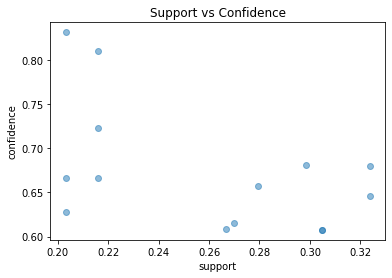

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

FPGrowth serves essentially the same function as that by the Apriori function, however it is supposed to give us an improvement in speed from the regular apriori function.

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

freq_items_fptree = fpgrowth(ohe_df, min_support=0.2, use_colnames=True)
freq_items_fptree.sort_values(by='support',ascending=False).head(30)

,support,itemsets
0,0.504762,(Bread)
7,0.501587,(Milk)
1,0.501587,(Cheese)
2,0.476190,(Meat)
3,0.438095,(Wine)
4,0.438095,(Eggs)
8,0.425397,(Bagel)
5,0.406349,(Diaper)
6,0.361905,(Pencil)
10,0.323810,"(Cheese, Meat)"


Here, we will compare the time taken by the apriori function vs that by the FPTree function. we see that FPTree reduced the time taken by a factor of 2. In case the dataset was a lot bigger like in real life, we would get even more speed up

In [ ]:
import time

curr_time = time.time()
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
apriori_time = time.time() - curr_time
print("apriori time:", apriori_time)
curr_time = time.time()
freq_items_fptree = fpgrowth(ohe_df, min_support=0.2, use_colnames=True)
fptree_time = time.time() - curr_time
print("fptree time:", fptree_time)

apriori time: 0.01512289047241211
fptree time: 0.00793600082397461
